In [1]:
import time
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

sns.set(style='whitegrid')
plt.rcParams["figure.figsize"]=(20, 10)
pd.set_option('display.float_format', lambda x: '%f' % x)

### Clustering

A cluster refers to a collection of data points aggregated together because of certain similarities.

![Cluster comparison](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

#### K-Means clustering

K-Means clustering method is one of the most used and popular ones. It tries to group similar points together, and discover patterns between them, by looking for a number (k) of clusters in a dataset.

#### Elbow method

Used to find the optimal k value.

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

![Elbow method](https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/995b8b58-06f1-4884-a2a1-f3648428e947.png)

The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

In [2]:
df = pd.read_csv('iris.csv')
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa


Columns:
- Sepal Length
- Sepal width
- Petal length
- Petal width

In [3]:
column_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

To calculate the error we can find the centroid of the set, and then the sum of the distances from the centroid would be our error.

Sklearn implements this in the 'inertia_: float' attribute:
- Sum of squared distances of samples to their closest cluster center.

In [4]:
def plot_elbow(values):
    error_sum = []
    
    for k in range(1, 10):
        km = KMeans(n_clusters = k).fit(values)
        error_sum.append(km.inertia_)
    
    plt.plot(range(1, 10), error_sum)
    plt.show()

In [5]:
X, Y = datasets.load_iris(return_X_y=True)

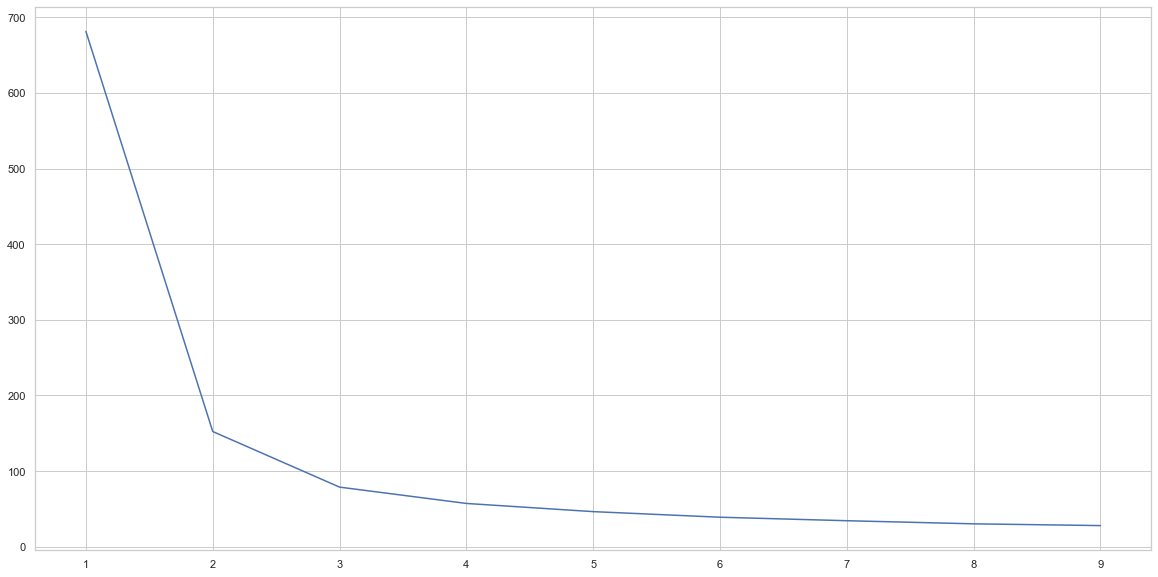

In [6]:
plot_elbow(X)

The elbow starts at 2 and ends around 4, then it converts into a gentle slope, we can pick the value in the middle which is k=3

Text(0, 0.5, 'Sepal width')

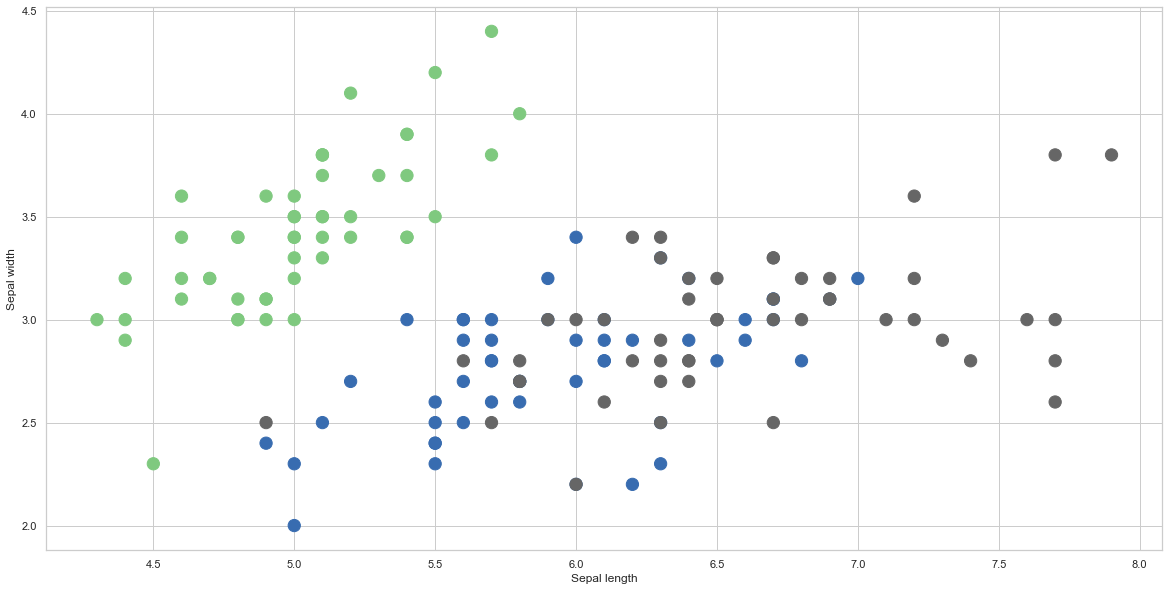

In [7]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap = 'Accent', s=150)
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])

In [8]:
y_pred = KMeans(n_clusters = 3, random_state=0).fit_predict(X)

In [9]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [10]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

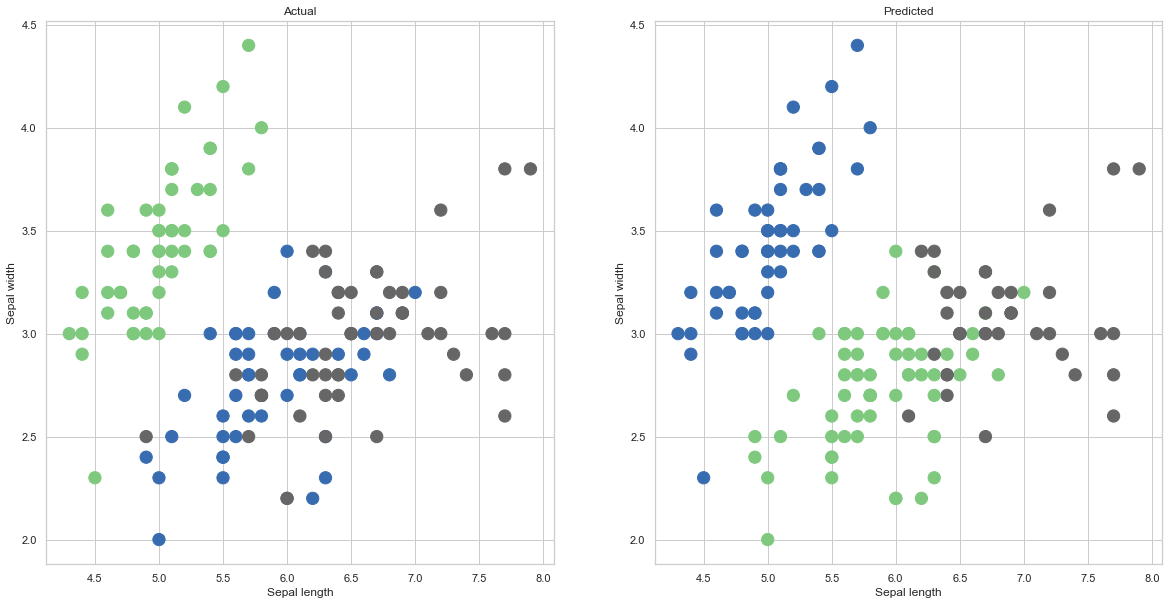

In [11]:
fig, axes = plt.subplots(1, 2)
axes[0].scatter(X[:,0], X[:, 1], c=Y, cmap = 'Accent', s=150)
axes[1].scatter(X[:,0], X[:, 1], c=y_pred, cmap = 'Accent', s=150)

axes[0].set_xlabel('Sepal length')
axes[0].set_ylabel('Sepal width')
axes[1].set_xlabel('Sepal length')
axes[1].set_ylabel('Sepal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')

plt.show()

### Kernel density estimation

In [12]:
tips = sns.load_dataset("tips")

Histogram shows number of samples in each bin. It doesn't matter whether the value is close to the left or right of the individual bin.

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

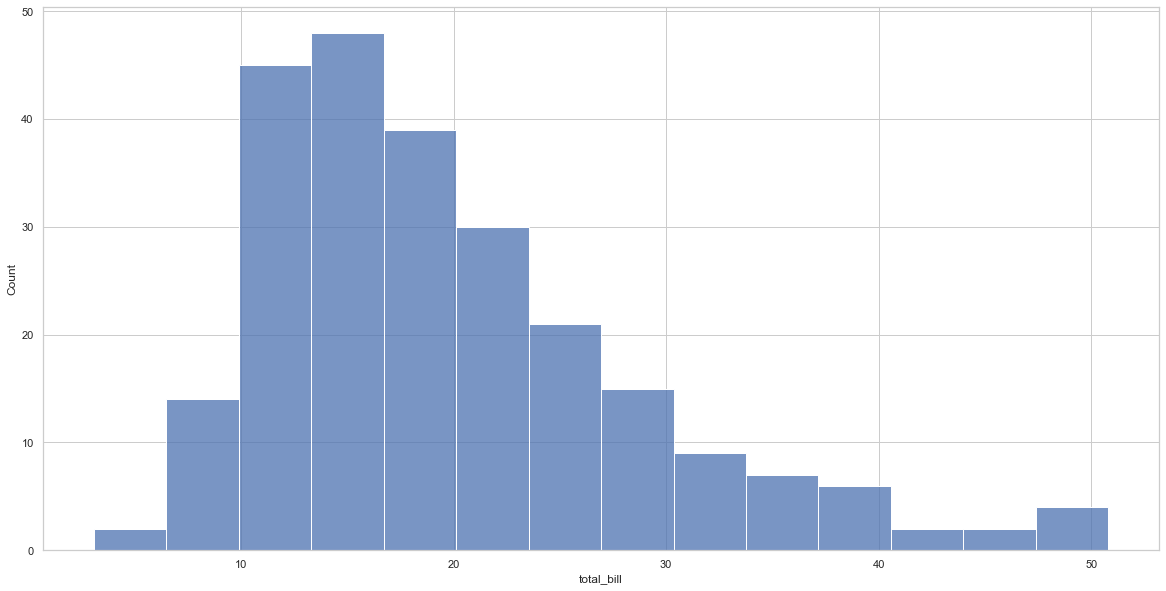

In [13]:
sns.histplot(data=tips, x="total_bill")

KDE plot is normalized, so that the area under the curve is equal to 1. It takes each value and draws a small bell curve, then sums all the curves together to form the final plot.

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

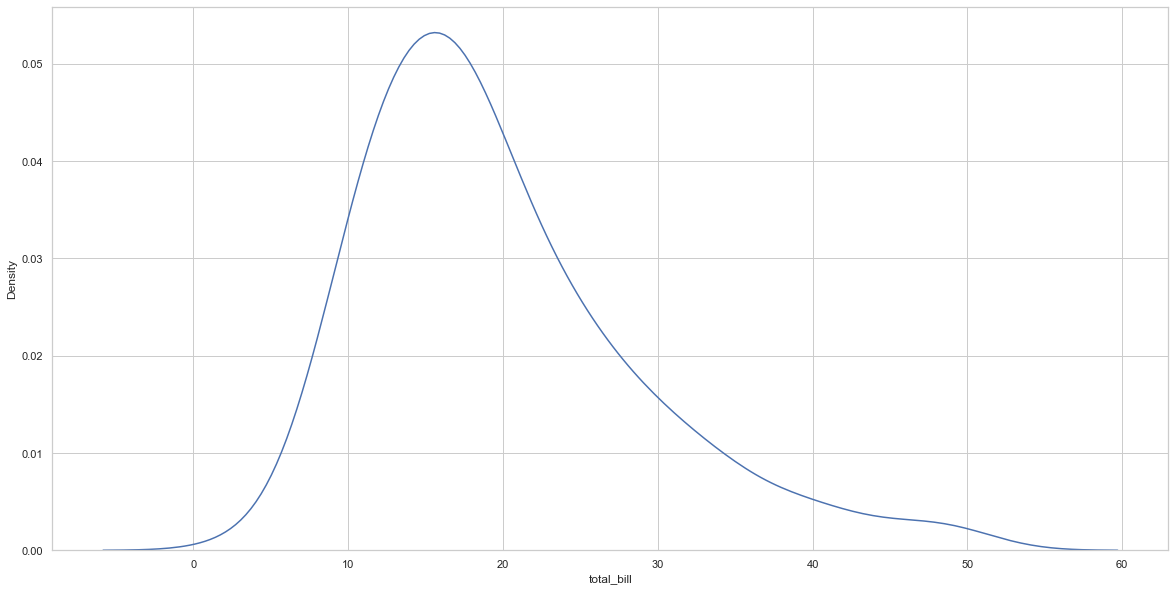

In [14]:
sns.kdeplot(data=tips, x="total_bill")

### Outlier detection

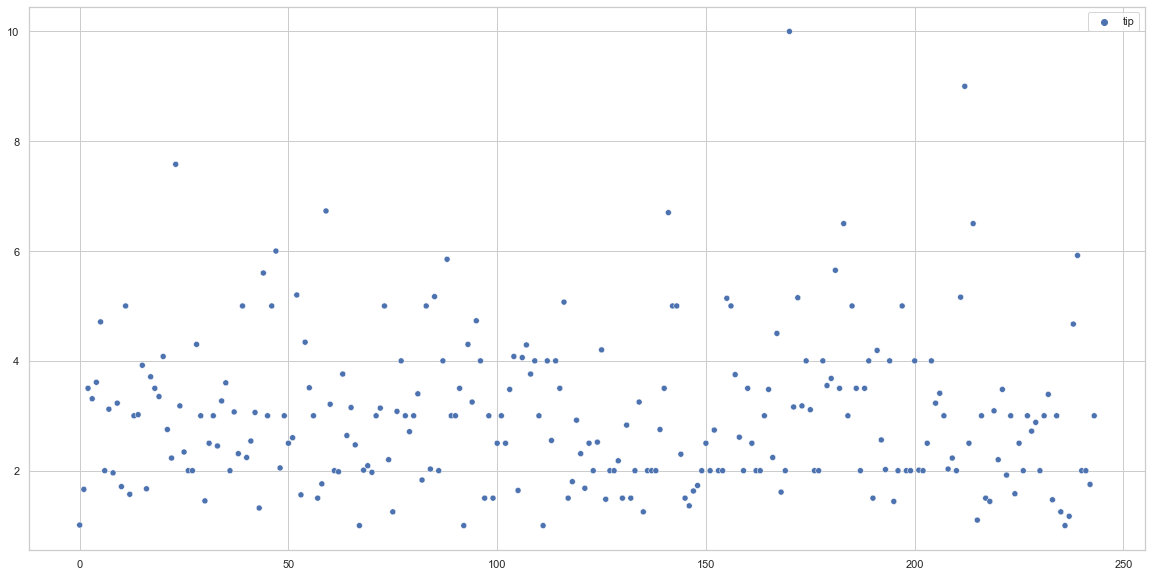

In [15]:
sns.scatterplot(data=[tips.tip])
plt.show()

The Z-score, or standard score, is a fractional representation of standard deviations from the mean value.

In [16]:
z = np.abs(stats.zscore(tips.total_bill))

In [17]:
print("Number of records with z-score higher than 3: {}".format(len(np.where(z > 3)[0])))
print("Number of records with z-score lower than 3: {}".format(len(np.where(z < 3)[0])))

Number of records with z-score higher than 3: 4
Number of records with z-score lower than 3: 240


In [18]:
tips_z_score = tips[z < 3]

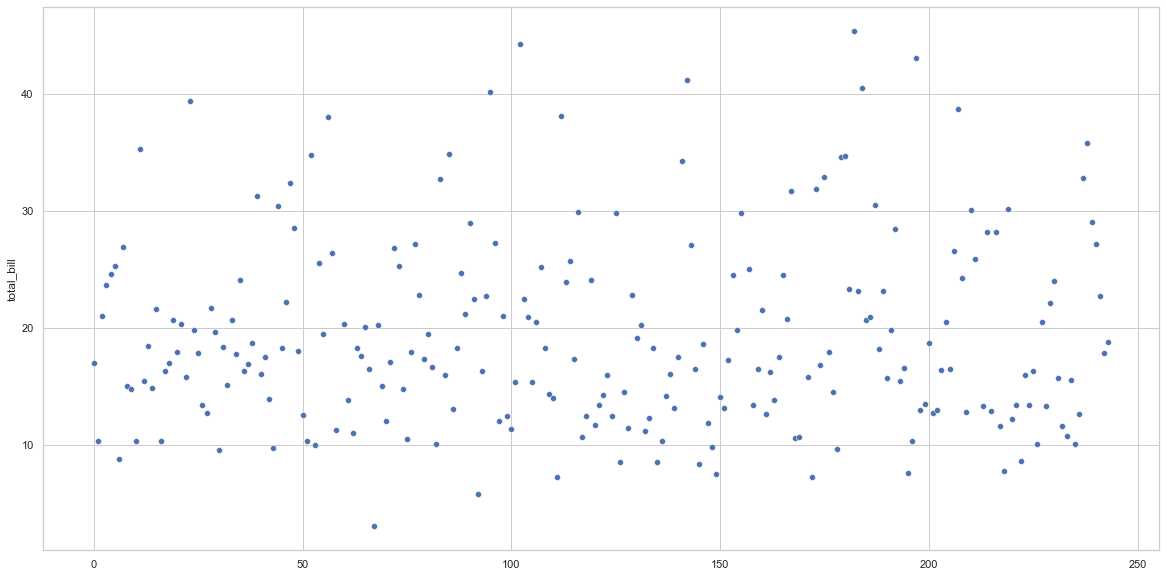

In [19]:
sns.scatterplot(data=tips_z_score.total_bill)
plt.show()

The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.

The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. 

In [20]:
q1 = tips.quantile(0.25)
q3 = tips.quantile(0.75)
iqr = q3 - q1

In [21]:
print(iqr)

total_bill   10.780000
tip           1.562500
size          1.000000
dtype: float64


In [22]:
tmp = (tips.total_bill < (q1.total_bill - 1.5 * iqr.total_bill)) | (tips.total_bill > (q3.total_bill + 1.5 * iqr.total_bill))
print("Number of records with IQR score indicating outlier: {}".format(len(np.where(tmp)[0])))

Number of records with IQR score indicating outlier: 9


In [23]:
tips_iqr = tips[~((tips.total_bill < (q1.total_bill - 1.5 * iqr.total_bill)) | (tips.total_bill > (q3.total_bill + 1.5 * iqr.total_bill)))]

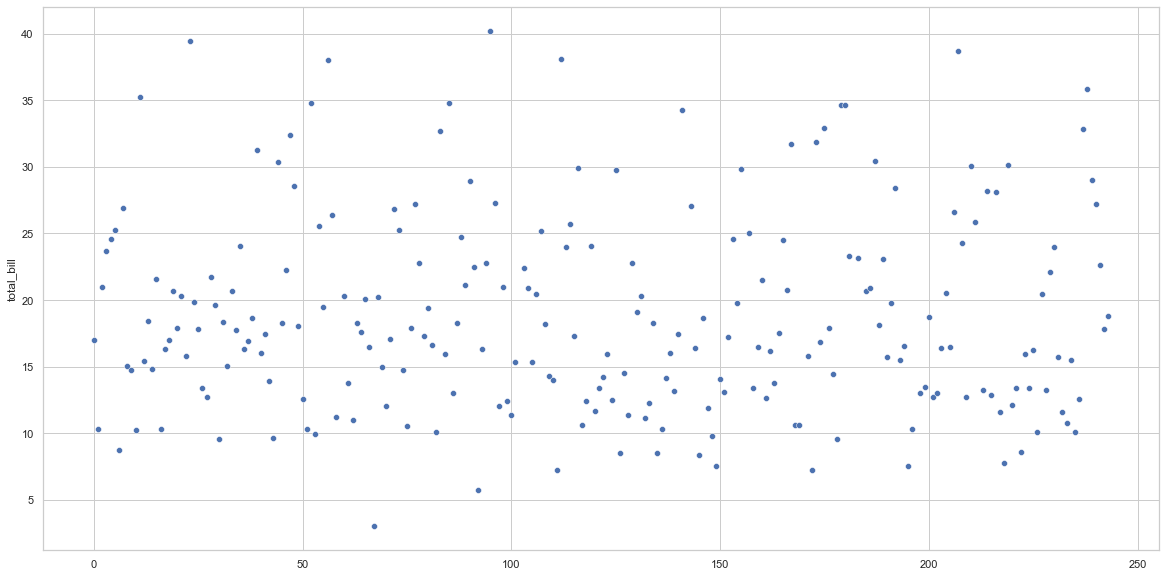

In [24]:
sns.scatterplot(data=tips_iqr.total_bill)
plt.show()

### Feature selection

In [25]:
df = datasets.load_iris(as_frame=True)
X, Y = datasets.load_iris(return_X_y=True)

#### Univariate selection

SelectKBest class scores the features using a function and leaves only K number of the highest scoring features

In [26]:
X_new = SelectKBest(chi2, k=3).fit(X, Y)
X_new.scores_

array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ])

In [27]:
features = pd.DataFrame(X_new.scores_)
cols = pd.DataFrame(df.feature_names)

In [28]:
featureScores = pd.concat([cols, features], axis=1)
featureScores.columns = ['features', 'scores']
featureScores

,features,scores
0,sepal length (cm),10.817821
1,sepal width (cm),3.710728
2,petal length (cm),116.312613
3,petal width (cm),67.048360


#### Feature importance

In [29]:
etc = ExtraTreesClassifier()
etc.fit(X, Y)

print(etc.feature_importances_)

[0.08921178 0.05574402 0.37468035 0.48036384]


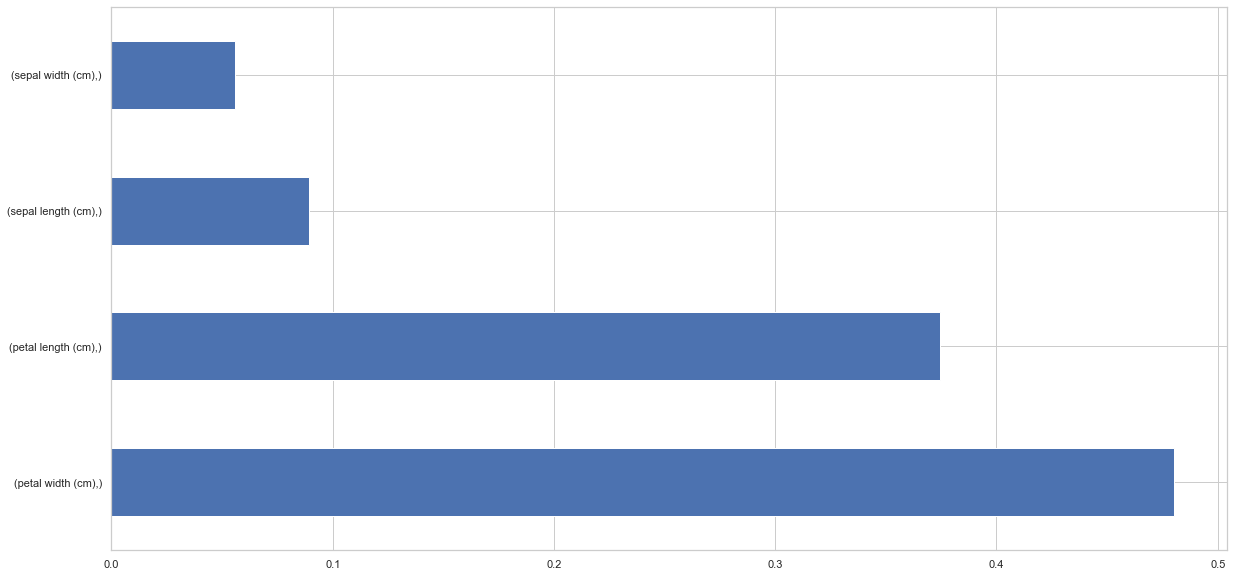

In [30]:
feat_importances = pd.Series(etc.feature_importances_, index=cols)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### Correlation matrix

When two features are highly correlated, usually we can drop one of them.

<AxesSubplot:>

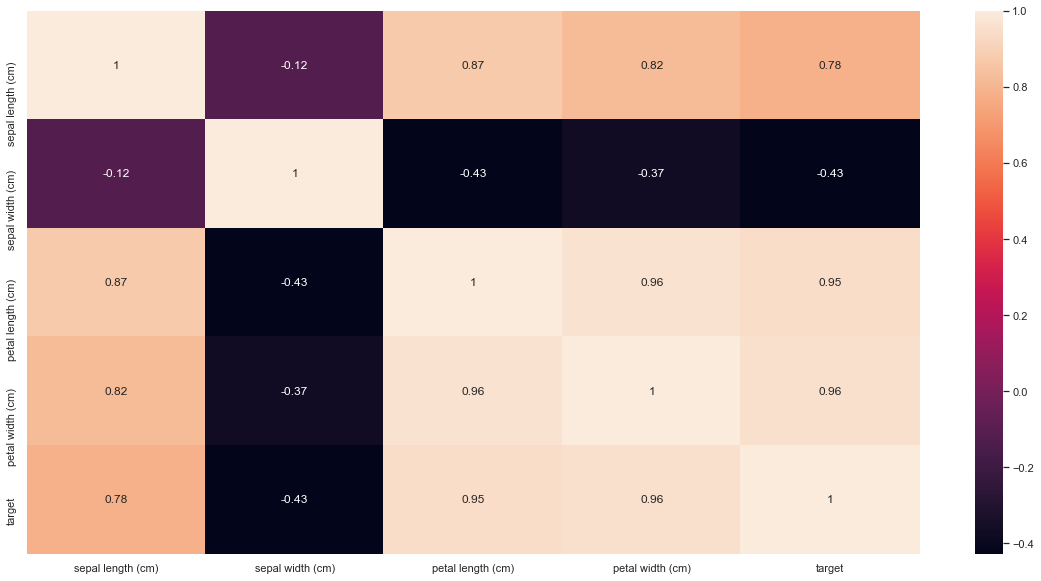

In [31]:
data = pd.DataFrame(data= np.c_[df['data'], df['target']],
                     columns= df['feature_names'] + ['target'])

corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

### Dimensionality reduction

The number of input variables or features for a dataset is referred to as its dimensionality.
Dimensionality reduction refers to techniques that reduce the number of input variables in a dataset.

In [32]:
X, y = datasets.load_digits(return_X_y=True)

Reduce to 2 dimensions

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)

In [34]:
pca = make_pipeline(StandardScaler(), PCA(n_components=2))

In [35]:
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))

In [36]:
nca = make_pipeline(StandardScaler(), NeighborhoodComponentsAnalysis(n_components=2))

Classifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=3)

In [38]:
def reduce_dimensions(name, model):
    model.fit(X_train, y_train)
    knn.fit(model.transform(X_train), y_train)

    knn_score = knn.score(model.transform(X_test), y_test)
    transformed_X = model.transform(X)

    plt.scatter(transformed_X[:, 0], transformed_X[:, 1], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name, 2, knn_score))

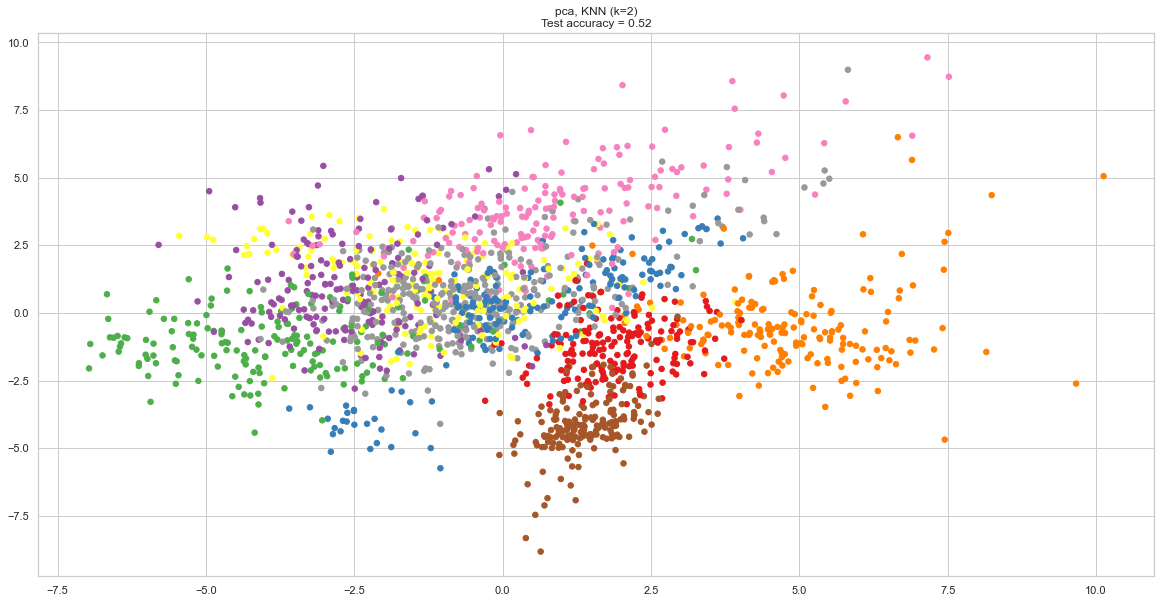

In [39]:
reduce_dimensions('pca', pca)

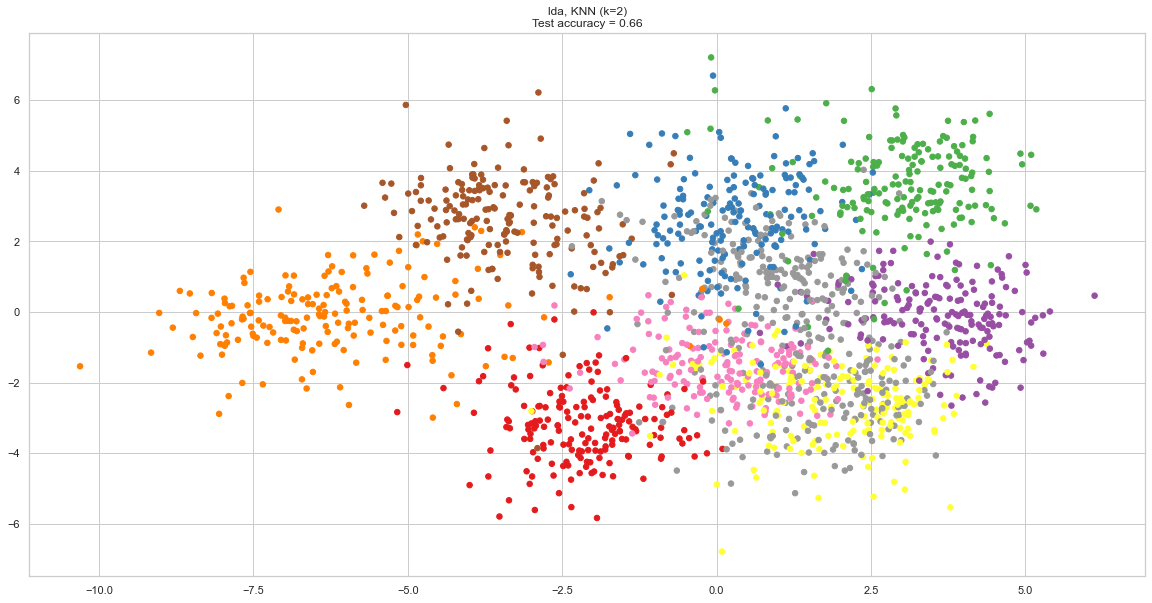

In [40]:
reduce_dimensions('lda', lda)

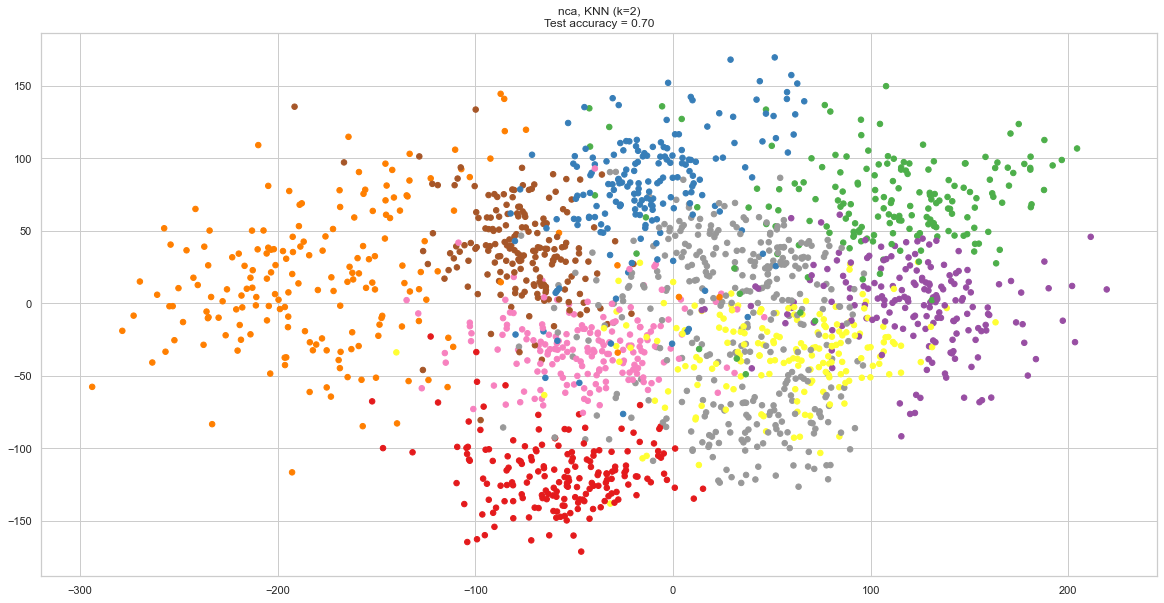

In [41]:
reduce_dimensions('nca', nca)

In [42]:
def plot_con_matrix(class_names, classifier, X_test, y_test):
    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, X_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        disp.ax_.grid(False)

        print(title)
        print(disp.confusion_matrix)

    plt.show()

### Ensemble methods

Weak learners (multiple basic models) are combined to get better results. Usually these basic models are weak because they have a high bias or too much variance, by combining them we try to reduce these flaws to get a strong learner (ensemble model). 

Homogeneous model - a single base learning algorithm is used - it should not be fine tuned, but weak

In [43]:
X, y = datasets.make_classification(n_samples=30000, n_features=20, n_informative=5, n_redundant=15, random_state=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Bootstrap aggregation - Bagging

Type of homogeneous ensemble models. Bagging resamples the original training dataset with replacement

Original training dataset: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10

Resampled training set 1: 2, 3, 3, 5, 6, 1, 8, 10, 9, 1

Resampled training set 2: 1, 1, 5, 6, 3, 8, 9, 10, 2, 7

Resampled training set 3: 1, 5, 8, 9, 2, 10, 9, 7, 5, 4

In [45]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None)

dtc = clf_tree.fit(X_train, y_train)
dtc.score(X_train, y_train), dtc.score(X_test, y_test)

(1.0, 0.8937777777777778)

In [46]:
scores = cross_val_score(clf_tree, X_train, y_train, cv=5)
scores.mean()

0.8976190476190476

In [47]:
y_pred = dtc.predict(X_test)

In [48]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 9000 points : 956


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      4559
           1       0.89      0.90      0.89      4441

    accuracy                           0.89      9000
   macro avg       0.89      0.89      0.89      9000
weighted avg       0.89      0.89      0.89      9000



In [50]:
bcf = BaggingClassifier(base_estimator=clf_tree, max_samples=1.0, bootstrap=True)

bcf.fit(X_train, y_train)
bcf.score(X_train, y_train), bcf.score(X_test, y_test)

(0.9955714285714286, 0.9291111111111111)

In [51]:
scores = cross_val_score(bcf, X_train, y_train, cv=5)
scores.mean()

0.9292380952380952

In [52]:
y_pred = bcf.predict(X_test)

In [53]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 9000 points : 638


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      4559
           1       0.92      0.94      0.93      4441

    accuracy                           0.93      9000
   macro avg       0.93      0.93      0.93      9000
weighted avg       0.93      0.93      0.93      9000



### Boosting

"Each classifier is trained on data, taking into account the previous classifiers’ success. After each training step, the weights are redistributed. Misclassified data increases its weights to emphasise the most difficult cases"

In [55]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)
gbc.score(X_train, y_train), gbc.score(X_test, y_test)

(0.9066666666666666, 0.8922222222222222)

In [56]:
scores = cross_val_score(gbc, X_train, y_train, cv=5)
scores.mean()

0.8944761904761904

In [57]:
y_pred = gbc.predict(X_test)

In [58]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 9000 points : 970


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      4559
           1       0.87      0.92      0.89      4441

    accuracy                           0.89      9000
   macro avg       0.89      0.89      0.89      9000
weighted avg       0.89      0.89      0.89      9000



### Boosting vs Bagging

Boosting:
- tries to reduce bias
- can increase over-fitting
- determines weights for data to favor difficult cases
- builds new learners sequential

Bagging
- may solve over-fitting
- equal weights for data
- builds new learners parallel

### Random forests

Ensemble method made up of a large number of decision trees. Each tree votes on the class it predicted, and the class with the most votes is the final prediction.

The key to accuracy is the low correlation of the individual trees, it accomplishes this by:
- bagging - each tree randomly samples from the dataset with replacement, resulting in high variance
- feature randomness - when splitting a node, instead of picking the most separated feature, each tree can only pick a feature from a random subset 

![Feature randomness](https://miro.medium.com/max/1240/1*EemYMyOADnT0lJWSXmTDdg.jpeg)

The final trees are trained on on different sets of data and use different features to make decisions.

In [60]:
clf_forest = RandomForestClassifier(random_state=0)

rfc = clf_forest.fit(X_train, y_train)
rfc.score(X_train, y_train), rfc.score(X_test, y_test)

(1.0, 0.9331111111111111)

In [61]:
scores = cross_val_score(rfc, X_train, y_train, cv=5)
scores.mean()

0.9333809523809524

In [62]:
y_pred = rfc.predict(X_test)

In [63]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 9000 points : 602


In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      4559
           1       0.92      0.95      0.93      4441

    accuracy                           0.93      9000
   macro avg       0.93      0.93      0.93      9000
weighted avg       0.93      0.93      0.93      9000

